In [173]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [174]:
mypath = r'C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\analysis_20215'
f = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    break

In [175]:
number_of_configurations = len(dirnames)
number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[0])) - 1

In [176]:
number_of_configurations, number_instances_per_config

(15, 10)

In [177]:
print("Folders")
for i, dirname in enumerate(dirnames):
    print(i, ' ', dirname)

Folders
0   a_len_20215_400_771_22_11_30_12_08
1   a_len_20215_400_771_22_11_30_12_11
2   a_len_20215_400_771_22_11_30_12_14
3   a_len_20215_400_771_22_11_30_12_17
4   a_len_20215_400_771_22_11_30_12_19
5   a_len_20215_400_771_22_11_30_12_24
6   a_len_20215_400_771_22_11_30_13_20
7   a_len_20215_400_771_22_11_30_13_30
8   a_len_20215_400_771_22_11_30_13_39
9   a_len_20215_400_771_22_11_30_13_49
10   a_len_20215_400_771_22_11_30_14_00
11   a_len_20215_400_771_22_11_30_14_24
12   a_len_20215_400_771_22_11_30_14_33
13   a_len_20215_400_771_22_11_30_14_45
14   a_len_20215_400_771_22_11_30_14_55


In [178]:
config_num = 0
instance_num = 0

def text_to_float(text):
    return float(text.split('= ')[-1].split(' \n')[0])

def retrieve_instance_result(config_num, instance_num):
    """
    returns runtime and objective for a given configuration and instance number
    """
    path = mypath + '/' + dirnames[config_num]
    instance_filename = f'instance_{instance_num}.txt'

    if instance_filename in os.listdir(path):
        with open(path + '/' + instance_filename) as f:
            contents = f.readlines()
            
    rt = text_to_float(contents[-2])
    obj = text_to_float(contents[-1])
            
    return rt, obj

In [179]:
retrieve_instance_result(0, 0)

(0.21900000001187436, 9.0)

In [180]:
number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[0])) - 7
number_instances_per_config

4

In [181]:
find_inst = os.listdir(mypath + '/' + dirnames[0])

instance_num_list = []

for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name)
instance_num_list

['instance_0.txt',
 'instance_1.txt',
 'instance_2.txt',
 'instance_3.txt',
 'instance_4.txt']

In [182]:
def get_metric_over_all_instances(config_num, metric):
    """
    Gets the runtime or obj for a given configuration number
    """
    number_of_configurations = len(dirnames)
    find_inst = os.listdir(mypath + '/' + dirnames[config_num])

    instance_num_list = []

    for name in find_inst:
        if name[0] == 'i':
            instance_num_list.append(name)
        
    metric_vals = []
    
    for instance_num in range(len(instance_num_list)):
        rt, obj = retrieve_instance_result(config_num, instance_num)
        
        if metric == 'runtime':
            metric_vals.append(rt)
            
        elif metric == 'obj':
            metric_vals.append(obj)
    
    return metric_vals

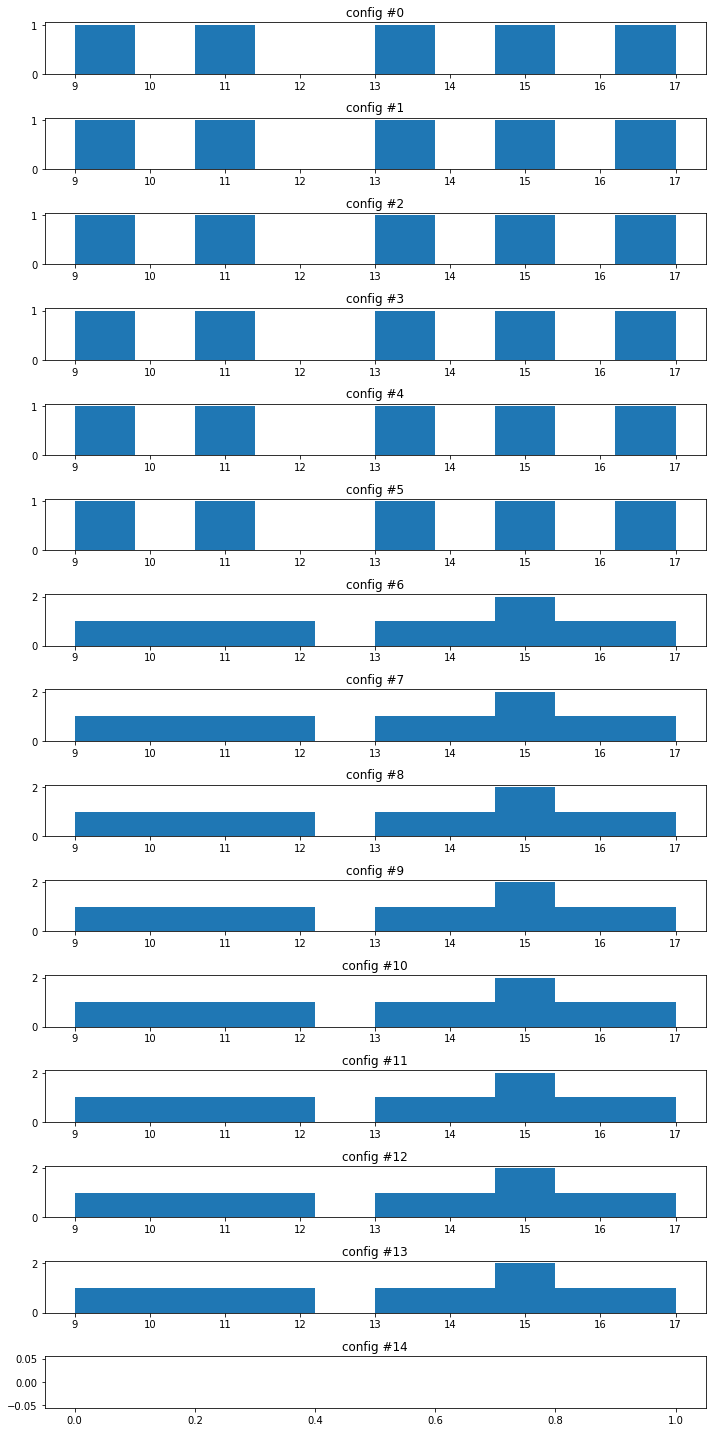

In [186]:
fig, ax = plt.subplots(number_of_configurations, 1, figsize=(10,20))
metric = 'obj'


for config_num in range(number_of_configurations):
    metric_vals = get_metric_over_all_instances(config_num=config_num, metric=metric)
    #print(metric_vals)
    ax[config_num].hist(metric_vals)
    ax[config_num].set_title(f'config #{config_num}')
    
fig.tight_layout()